## 라이브러리 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

## 주파수 f, 각주파수 w 정의

In [2]:
f1 = 2  # 주파수 입력
f2 = 8
f3 = 4
f4 = 6
f5 = 10

w1 = 2*np.pi*f1  # w = 2pi*f
w2 = 2*np.pi*f2
w3 = 2*np.pi*f3
w4 = 2*np.pi*f4
w5 = 2*np.pi*f5

In [3]:
print("f1 =",f1, "/ f2 =",f2, "/ f3 =",f3, "/ f4 =",f4, "/ f5 =",f5 )
print("w1 =",w1, "/ w2 =",w2, "/ w3 =",w3, "/ w4 =",w4, "/ w5 =",w5 )

f1 = 2 / f2 = 8 / f3 = 4 / f4 = 6 / f5 = 10
w1 = 12.566370614359172 / w2 = 50.26548245743669 / w3 = 25.132741228718345 / w4 = 37.69911184307752 / w5 = 62.83185307179586


## 샘플링 주파수, 이산함수 정의 및 그래프

In [4]:
# 시간열 생성
t = np.arange(0,10,0.005)    # sampling freq : 200 Hz // sampling time : 10 seconds
x1 = np.concatenate([np.sin(w1*t), np.sin(w2*t), np.sin(w3*t), np.sin(w4*t), np.sin(w5*t)])

# 전체 시간열 생성
t_total = np.arange(0, 50, 0.005)
x2 = np.sin(w1*t_total) + np.sin(w2*t_total) + np.sin(w3*t_total) + np.sin(w4*t_total) + np.sin(w5*t_total)

t.shape, t_total.shape, x1.shape, x2.shape

((2000,), (10000,), (10000,), (10000,))

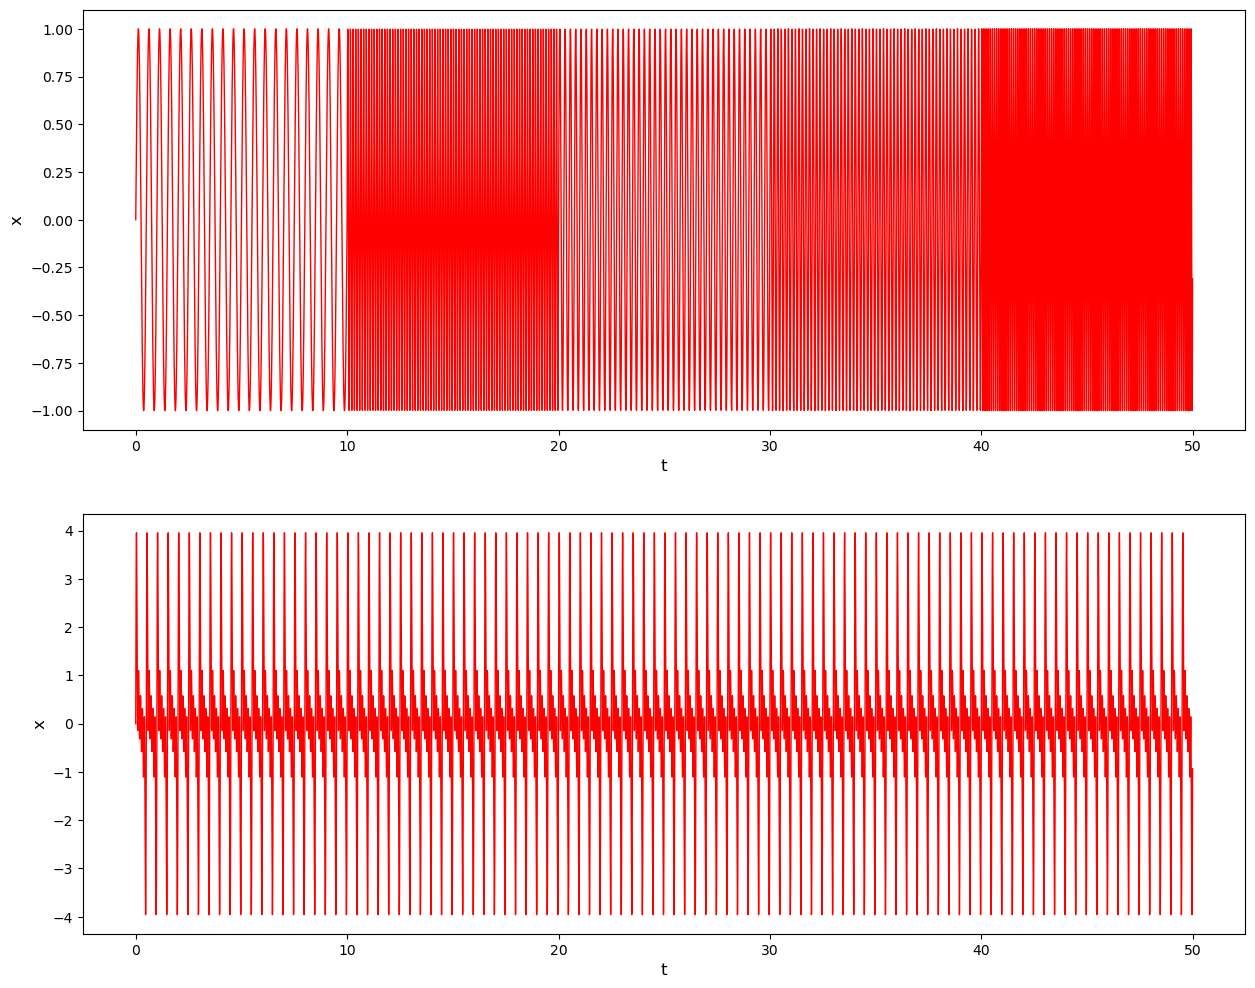

In [5]:
plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
plt.plot(t_total, x1, 'r-', lw = 1)
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
#plt.xlim(0,1)

plt.subplot(2, 1, 2)
plt.plot(t_total, x2, 'r-', lw = 1)
plt.xlabel('t',fontsize=12)
plt.ylabel('x',fontsize=12)
#plt.xlim(0,1)


plt.show()

Sampling frequency 계산 : Fs = 데이터 개수/시간

In [6]:
Fs = int(len(t_total)/t_total[-1])
Fs

200

#### X1

FFT 연산

In [7]:
NFFT   =  len(x1)
k      =  np.arange(NFFT)
f0     =  k * Fs / NFFT
f0     =  f0[range(math.trunc(NFFT/2))]

Y      =  np.fft.fft(x1)/NFFT
Y      =  Y[range(math.trunc(NFFT/2))]
amp_Hz =  2 * abs(Y)
phase_ang = np.angle(Y) * 180/np.pi

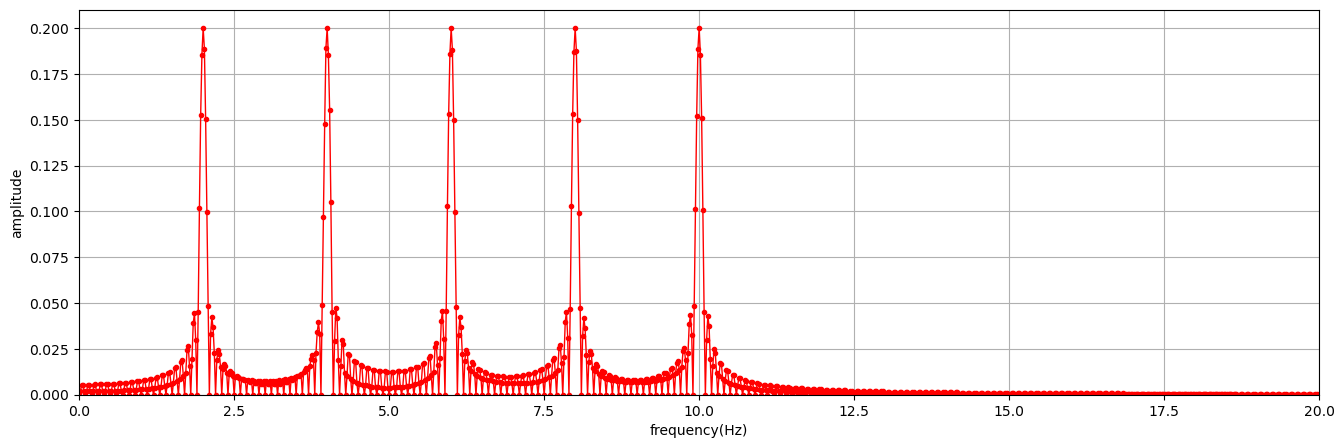

In [8]:
plt.figure(figsize=(16,5))
plt.plot(f0,amp_Hz,'r.-', lw=1)
plt.xlim(0, 20)
plt.ylim(0)
# plt.xticks(np.arange(0,(Fs/2)+1))
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()

#### X2

FFT 연산

In [9]:
NFFT   =  len(x2)
k      =  np.arange(NFFT)
f0     =  k * Fs / NFFT
f0     =  f0[range(math.trunc(NFFT/2))]

Y      =  np.fft.fft(x2)/NFFT
Y      =  Y[range(math.trunc(NFFT/2))]
amp_Hz =  2 * abs(Y)
phase_ang = np.angle(Y) * 180/np.pi

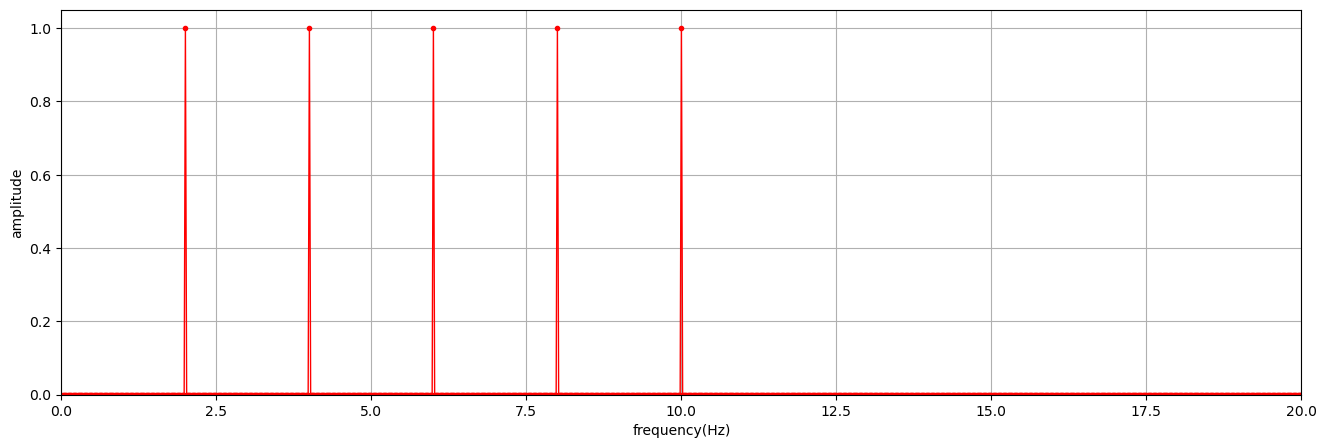

In [10]:
plt.figure(figsize=(16,5))
plt.plot(f0,amp_Hz,'r.-', lw=1)
plt.xlim(0, 20)
plt.ylim(0)
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()

## STFT

#### X1

Spectrogram 생성

In [11]:
# 파라미터
Fs        = 1/0.005   # 샘플링 주파수

f,t,Sxx = signal.spectrogram(x1, Fs, nperseg = 500, noverlap = 500//3)
# f,t,Sxx = signal.spectrogram(x1, Fs)
f.shape, t.shape, Sxx.shape

((251,), (29,), (251, 29))

STFT 그래프 (Frequency & Time domain)

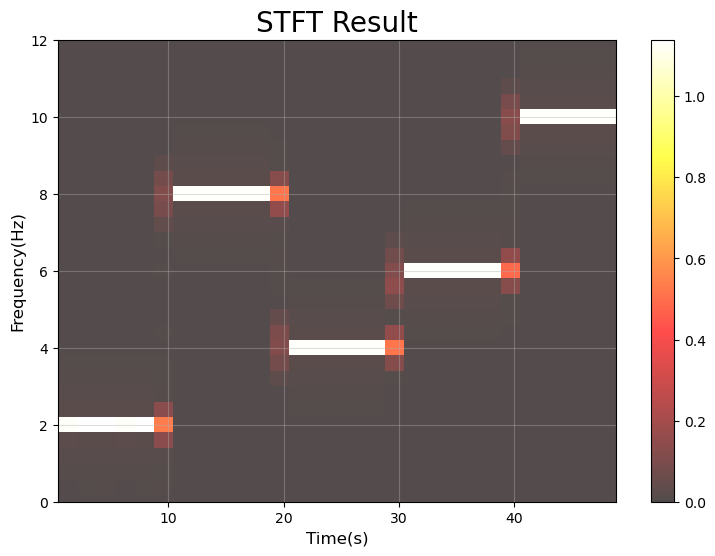

In [12]:
plt.figure(figsize=(9,6))

plt.pcolormesh(t, f, Sxx, vmax = np.max(Sxx), cmap = 'hot', alpha = 0.7)
plt.ylim((0, 12))
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Frequency(Hz)', fontsize=12)
plt.title('STFT Result', fontsize=20)
plt.colorbar()
plt.grid(alpha = 0.4)

plt.show()

#### X2

Spectrogram 생성

In [13]:
# 파라미터
Fs        = 1/0.005   # 샘플링 주파수

f,t,Sxx = signal.spectrogram(x2, Fs, nperseg = 500, noverlap = 500//3)
# f,t,Sxx = signal.spectrogram(x2, Fs)
f.shape, t.shape, Sxx.shape

((251,), (29,), (251, 29))

STFT 그래프 (Frequency & Time domain)

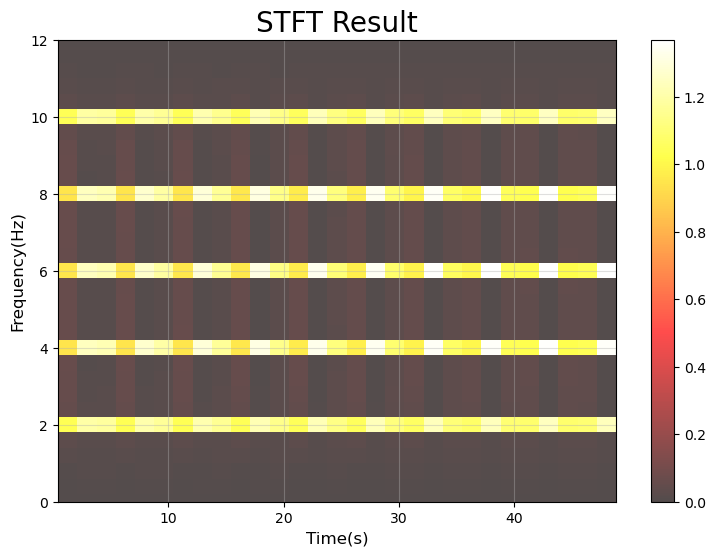

In [14]:
plt.figure(figsize=(9,6))

plt.pcolormesh(t, f, Sxx, vmax = np.max(Sxx), cmap = 'hot', alpha = 0.7)
plt.ylim((0, 12))
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Frequency(Hz)', fontsize=12)
plt.title('STFT Result', fontsize=20)
plt.colorbar()
plt.grid(alpha = 0.4)

plt.show()